<img align="right" width="120" height="120" style='padding: 0px 30px;' src="images/RR-logo.png"/>

# Introduction to Machine Learning with scikit-learn
This notebook will introduce the popular (and free!) machine learning toolkit [``scikit-learn``](https://scikit-learn.org/) written in Python. scikit-learn offers algorithms for supervised and unsupervised learning, dimensionality reduction, model selection and evaluation, and even some techniques for the visualization of results. It is designed to integrate nicely with other popular toolkits like [matplotlib](https://matplotlib.org/) and [plotly](https://plotly.com/) (for visualizations), [pandas](https://pandas.pydata.org/) (for tabular data analysis and manipulation), and [NumPy](https://numpy.org/) and [SciPy](https://scipy.org/) (for scientific computing). We will see some of this integration later!


In this exercise, we will walk through a typical processing pipeline to train and evaluate a simple classifier. 




*Click into a cell and hit "Shift+Enter" to execute it!*

In [18]:
""" Let's apply some Dartmouth-style colors to our plots """

import matplotlib as mpl

dartmouth_colors = ["#00693E", "#12312B", "#C3DD88", "#6EAA8D", "#797979", "#EBF3EF"]

mpl.rcParams.update({
                        'figure.facecolor': "#EBF3EF",
                        'figure.figsize': [7.50, 3.50],
                        'axes.prop_cycle': mpl.cycler(color=dartmouth_colors),
                        'axes.facecolor': "#FFFFFF",
                        'axes.labelcolor': '#12312B',
                        'text.color': '#12312B'
                    })

## Loading a dataset

In this notebook, we will work with the famous *Iris* flower dataset. It is a multivariate dataset consisting of 50 samples from each of three species of *Iris*. Each sample is described in terms of four features: the length and width of its sepals and its petals.

<style type="text/css" >
table {
    border-style: hidden;
    border-collapse: collapse;
    text-align: center;
    border-top: 3px solid;
    border-bottom: 3px solid;
}

tr, td, th {
    border-bottom: none !important;
    border-left: none !important;
    border-right: none !important;
}

</style>

<table>
  <tr>
    <th>Iris setosa</th>
    <th>Iris versicolor</th>
    <th>Iris virginica</th>    
  </tr>
  <tr>
    <td><img align="center" width="200" height="200" src="images/iris_setosa.jpg"/></td>
    <td><img align="center" width="200" height="200" src="images/iris_versicolor.jpg"/></td>
    <td><img align="center" width="200" height="200" src="images/iris_virginica.jpg"/></td>
  </tr>
  <tr>
    <td><a href="https://commons.wikimedia.org/wiki/File:Iris_setosa_2.jpg" target="_blank">"Iris setosa"</a> by <a href="https://commons.wikimedia.org/wiki/User:Kulmalukko" target="_blank">Tiia Monto</a><br> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0" target="_blank">CC BY-SA 4.0</a></td>
    <td><a href="https://commons.wikimedia.org/wiki/File:Blue_Flag_Iris_(15246206044).jpg" target="_blank">"Blue Flag Iris"</a> by <a href="https://www.flickr.com/people/49208525@N08" target="_blank">USFWSmidwest</a><br> is licensed under <a href="http://creativecommons.org/licenses/by/2.0" target="_blank">CC BY 2.0</a></td>
    <td><a href="https://commons.wikimedia.org/wiki/File:Iris_virginica_L_JdP_2013-05-28_n01.jpg" target="_blank">"Virginia Iris"</a> by <a>Marie-Lan Nguyen</a><br> is licensed under <a href="http://creativecommons.org/licenses/by/2.5" target="_blank">CC BY 2.5</a></td>    
  </tr>
  <tr>
    <td>Class 0</td>
    <td>Class 1</td>
    <td>Class 2</td>    
  </tr>
</table>

The data was originally collected by the American botanist Edgar Anderson [[1]](#anderson_1936) but it is so well known today because of its use by the British statistician and biologist Ronald Fisher, who used it to showcase his method of Linear Discriminant Analysis [[2]](#fisher_1936). Because of the dataset's simplicity and interesting structure, it lends itself well to demonstrations of all sorts of algorithms and is therefore still popular today among machine learning educators.

It is in fact so popular that it is shipped with ``scikit-learn`` and can be easily loaded into our workspace using the function [``load_iris()``](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) from the submodule ``sklearn.datasets``. 

Because it offers loads of convenient methods to manipulate and visualize our tabular data, we want to load the dataset as a [``pandas.DataFrame``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) object. We can do this by setting the parameter ``as_frame`` to ``True``.

In [45]:
from sklearn.datasets import load_iris

dataset = load_iris(as_frame=True)

When we load the dataset in this, way we get a special, ``scikit-learn``-specific data structure called a [``Bunch``](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch). A ``Bunch`` is very much like a standard Python [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries): It stores pairs of *keys* and *values*. We can obtain the *values* by passing the *key*. We can get a list of all the keys in the ``Bunch`` by calling its ``keys()`` method:

In [46]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Feel free to explore the values corresponding to the other keys, but in this notebook we will simply grab the ``DataFrame`` that is stored under ``frame`` and the names of the features (``'feature_names'``) and species (``'target_names'``):

In [66]:
iris = dataset['frame']
target_names = dataset['target_names']
feature_names = dataset['feature_names']

Let's do some quick visualization to see how many samples of each species we have in our dataset (the *class distribution*):

<AxesSubplot: >

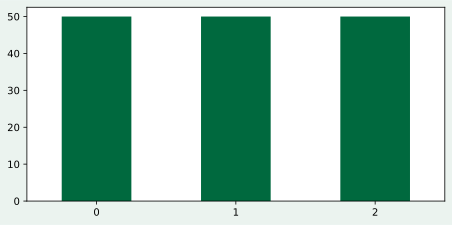

In [85]:
iris.target.value_counts().plot(kind='bar', rot=0)

Great, we have the same number of samples from each species (or class). That means our dataset is *balanced*. This is a good thing because in an *imbalanced* dataset, machine learning models tend to be better at identifying the majority class than the minority class and we need to apply special techniques to counter this behavior (e.g. over- or undersampling, or special scoring metrics). Our balanced Iris dataset does not need any special attention in that regard.

Next, let us take a look a the features and if we can spot any patterns in them!

One way to do this is to plot all the two-dimensional scatter plots:
- *sepal length* versus *sepal width*
- *petal length* versus *petal width*
- *sepal length* versus *petal length*
- ...

That is a lot of plots. Luckily, we can use a function from the package ``pandas`` called [``scatter_matrix()``](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) that conveniently does all the work for us!

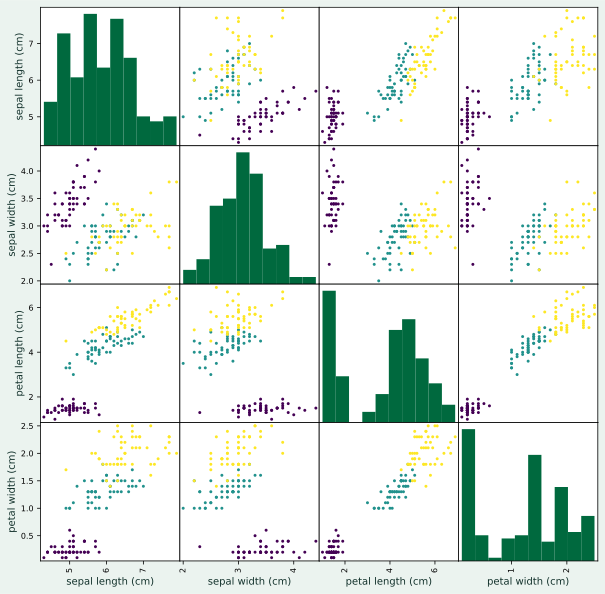

In [77]:
import pandas as pd

ax = pd.plotting.scatter_matrix(frame=iris[feature_names], c=iris['target'], alpha=1.0, figsize=(10, 10))

We can see that in some plots, the samples can be separated by species (i.e. *classified*) fairly well, while they are more mixed in others. We also suspect some correlations between features. Let's investigate by calculating the pair-wise correlation using the ``DataFrame`` method [``corr()``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)!

In [86]:
iris[feature_names].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Indeed, we have quite strongly correlated features in this dataset! 

In machine learning, we generally prefer uncorrelated features because correlated features add only very little information that can help to differentiate between the classes.

We should keep the strong correlations in mind for later. As a general rule, a simple model using few featuers is preferred over a complex model using many features. So maybe we don't even need to use all features in our model?



## Preprocessing


In [ ]:
from sklearn.preprocessing import StandardScaler

X = iris[feature_names].values
y = iris['target'].values

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

## Dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)

X_pc = pca.transform(X_scaled)

## Training an estimator

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_pc, y)

## Testing an estimator

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8)

X_train_scaled = scaler.fit_transform(X_train)
X_train_pc = pca.fit_transform(X_train_scaled)

knn.fit(X_train_pc, y_train)

X_test_scaled = scaler.transform(X_test)
X_test_pc = pca.transform(X_test_scaled)

y_pred = knn.predict(X_test_pc)

print(classification_report(y_test, y_pred))


## Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90],
    'p': [1, 2, 3]    
}

search = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=1, n_jobs=-1)
search.fit(X_train_pc, y_train)
search.best_params_

In [ ]:
print(classification_report(y_test, search.predict(X_test_pc)))

## Putting it all together

In [ ]:
from sklearn.pipeline import Pipeline

steps = [
    ('scaling', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
]

pipeline = Pipeline(steps)


param_grid = {
    'scaling__with_mean': [True, False],
    'scaling__with_std': [True, False],
    'pca__n_components': [1, 2, 3, 4],
    'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90],
    'knn__p': [1, 2, 3]    
}

find_best = GridSearchCV(pipeline, param_grid, verbose=1, n_jobs=-1)

find_best.fit(X_train, y_train)
find_best.best_params_

In [ ]:
import pandas as pd
results = pd.DataFrame(find_best.cv_results_)
results.sort_values('rank_test_score')

In [ ]:
print(classification_report(y_test, find_best.predict(X_test)))

[1] <a id=anderson_1936></a>Edgar Anderson (1936). "The species problem in Iris". *Annals of the Missouri Botanical Garden*. 23 (3): 457–509. [doi:10.2307/2394164](https://doi.org/10.2307%2F2394164). JSTOR [2394164](https://www.jstor.org/stable/2394164).

[2] <a id=fisher_1936></a>R. A. Fisher (1936). "The use of multiple measurements in taxonomic problems". *Annals of Eugenics*. 7 (2): 179–188. [doi:10.1111/j.1469-1809.1936.tb02137.x](https://doi.org/10.1111%2Fj.1469-1809.1936.tb02137.x). hdl:[2440/15227](https://hdl.handle.net/2440%2F15227). 